In [2]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file = [r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\0-2020-11_28_15-41-01.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\1-2020-11_29_03-41-15.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\2-2020-11_29_15-41-41.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\3-2020-11_30_03-42-53.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_2\4-2020-11_30_15-45-37.txt"]


param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

[neuro_lib.replace(i) for i in file]
[neuro_lib.replace(j, '         ', '\t') for j in file]
print (param_str)

[3.3, 68000]


In [4]:
import neuro_lib_2
i = 0
res_on_off = [neuro_lib_2.on_off_impulse(i) for i in file]
for j in range(0,4):
    print (res_on_off[j].head().to_string())

   N on_start_t on_start_V on_end_t  on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN       NaN         NaN         NaN    10.014  0.017625
1  1     10.531      0.019   11.534  0.028375      11.555       0.028       NaN       NaN
   N on_start_t on_start_V on_end_t  on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN       NaN         NaN         NaN    10.014  0.016375
1  1     10.532   0.017375   11.522   0.02525      11.542    0.024875    13.537     0.023
2  2      13.58    0.02425   14.596  0.030875      14.618        0.03    16.612  0.028125
3  3     16.646    0.02975   17.649   0.03575      17.673    0.035375    19.684   0.03275
4  4     19.715    0.03475   20.718  0.040625       20.74     0.03975    22.745  0.037375
   N on_start_t on_start_V on_end_t  on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN       NaN         NaN         NaN     10.01     0.019
1  1     1

In [9]:
import pandas as pd
import numpy as np
data = [pd.read_csv(i, header=None, sep = "\t") for i in file]
#data_V[1][2] = pd.Series()
#data_V[1][2] = pd.Series(0, index=data_V[1].index)         # можно по индекса менять значения
# for i in range(0, len(data)):
#     data[i][2] = 1/((param_str[0] - data[i][1])*param_str[1]/data[i][1]) # не хватает разрядности для преобразования в S
for j in range(0,5):
    print (data[j].head().to_string())
print (len(data))

      0         1
0     5  0.017875
1   506  0.017750
2  1006  0.017500
3  1507  0.017875
4  2007  0.017250
      0         1
0     5  0.015750
1   505  0.015875
2  1005  0.016000
3  1506  0.015875
4  2006  0.015875
      0         1
0     5  0.019000
1   505  0.018875
2  1005  0.019000
3  1505  0.018875
4  2006  0.018625
      0         1
0     5  0.029375
1   505  0.029125
2  1005  0.029125
3  1505  0.029250
4  2005  0.029250
      0         1
0     6  0.044250
1   507  0.044125
2  1007  0.044125
3  1507  0.044000
4  2007  0.044125
5


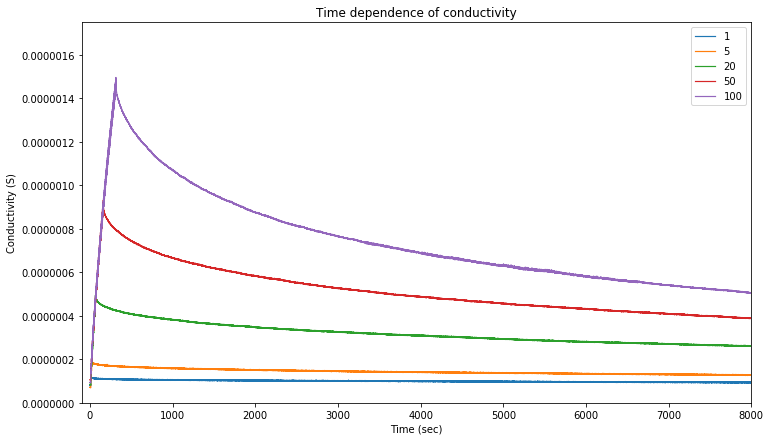

In [69]:
import matplotlib.pyplot as plt

x = list(data[0][0])
y = list(data[0][1])

popravka = [0,
            0,
            0,
            0,
            -0.00000005]
popravka_2 = [1,
            1,
            1,
            0.8,
            0.72]

for i in range(0, len(data)):
    x[i] = list(data[i][0]/1000)
    y[i] = (1/((param_str[0] - data[i][1])*param_str[1]/data[i][1]))*popravka_2[i] + popravka[i]

My_lable = ['1',
            '5',
            '20',
            '50',
            '100']

plt.figure(figsize=(12, 7))
plt.title("Time dependence of conductivity")
for i in range(0, len(data)):
    plt.plot(x[i], y[i] , linewidth = 1.2, label = My_lable[i])
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Conductivity (S)")
#plt.axis([-10, 50, 0, 0.0000004])
plt.axis([-100, 8000, 0, 0.00000175])

plt.show()